In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Configurações de exibição do pandas
pd.set_option('display.max_columns', None)  # Exibir todas as colunas
pd.set_option('display.width', 1000)  # Ajustar a largura da tela
pd.set_option('display.max_colwidth', None)  # Exibir o conteúdo completo das colunas

# Ler o arquivo CSV
dados = pd.read_csv('dados_climaticos.csv')

# Converter a coluna 'data' para datetime
dados['data'] = pd.to_datetime(dados['data'], format='%d/%m/%Y')

# Exibir as primeiras linhas do DataFrame para verificar se os dados foram carregados corretamente
print(dados.head())


        data  precip  maxima  minima  horas_insol  temp_media  um_relativa  vel_vento
0 1961-01-01     8.6    39.5    13.4          4.3        18.2         75.8        2.6
1 1961-01-02     2.4    25.0    19.9         11.9        14.7         79.1        1.6
2 1961-01-03    10.1    23.3    14.5          9.8        24.0         78.8        2.0
3 1961-01-04    18.6    22.1    15.8          7.3        17.7         83.7        1.6
4 1961-01-05     1.5    27.3    15.3          4.5        16.0         66.2        1.2


In [71]:
def encontrar_mes_ano_maior_precipitacao(dados):
    # Agrupar os dados por ano e mês e somar a precipitação
    dados['ano_mes'] = dados['data'].dt.to_period('M')
    precipitacao_agrupada = dados.groupby('ano_mes')['precipitacao'].sum()
    
    # Encontrar o mês:ano com a maior precipitação
    mes_ano_maior_precipitacao = precipitacao_agrupada.idxmax()
    maior_precipitacao = precipitacao_agrupada.max()
    
    return mes_ano_maior_precipitacao, maior_precipitacao

def calcular_media_temperatura_minima(dados, mes):
    if mes < 1 or mes > 12:
        raise ValueError("Mês inválido. Deve ser um valor entre 1 e 12.")
    
    temp_min_anos = {}
    
    # Filtrando dados para os anos 2006-2016 e mês informado
    dados_filtrados = dados[(dados['data'].dt.year >= 2006) & (dados['data'].dt.year <= 2016) &
                            (dados['data'].dt.month == mes)]
    
    # Calculando a média para cada ano
    for ano in range(2006, 2017):
        dados_ano = dados_filtrados[dados_filtrados['data'].dt.year == ano]
        if not dados_ano.empty:
            temp_min_anos[ano] = dados_ano['minima'].mean()  # Ajuste o nome da coluna conforme necessário
    
    return temp_min_anos

def gerar_grafico_barras(media_temp_min_anos, mes):
    anos = list(range(2006, 2017))  # Garantir que todos os anos de 2006 a 2016 sejam exibidos
    temperaturas = [media_temp_min_anos.get(ano, 0) for ano in anos]  # Usar 0 para anos sem dados
    if mes == 1: 
        mes = 'Janeiro'
    elif mes == 2: # Fevereiro
        mes = 'Fevereiro'
    elif mes == 3: # Março
        mes = 'Março'
    elif mes == 4: # Abril
        mes = 'Abril'
    elif mes == 5: # Maio
        mes = 'Maio'
    elif mes == 6: # Junho
        mes = 'Junho'
    elif mes == 7: # Julho
        mes = 'Julho'
    elif mes == 8: # Agosto
        mes = 'Agosto'
    elif mes == 9: # Setembro
        mes = 'Setembro'
    elif mes == 10: # Outubro
        mes = 'Outubro'
    elif mes == 11: # Novembro
        mes = 'Novembro'
    else: # Dezembro
        mes = 'Dezembro'
    plt.bar(anos, temperaturas, color='blue')
    plt.xlabel('Ano')
    plt.ylabel('Temperatura Mínima (°C)')
    plt.title(f'Temperatura Mínima Média em {mes} (2006-2016)')
    plt.xticks(anos)  # Definir explicitamente os ticks do eixo x
    plt.show()

def calcular_media_temperatura_minima_geral(media_temp_min_anos):
    temperatura_total = sum(media_temp_min_anos.values())
    contagem = len(media_temp_min_anos)
    if contagem > 0:
        return temperatura_total / contagem
    return None

def encontrar_mes_mais_chuvoso(dados):
    # Criar um dicionário para armazenar a precipitação total por mês/ano
    precip_totais = {}

    # Iterar sobre os dados e somar a precipitação por mês/ano
    for _, row in dados.iterrows():
        ano_mes = row['data'].strftime('%Y-%m')  # Mês e ano no formato 'YYYY-MM'
        precipitacao = row['precip']  # Ajuste conforme o nome da coluna

        if ano_mes not in precip_totais:
            precip_totais[ano_mes] = precipitacao
        else:
            precip_totais[ano_mes] += precipitacao

    # Encontrar o mês/ano com a maior precipitação
    mes_ano_mais_chuvoso = max(precip_totais, key=precip_totais.get)
    maior_precipitacao = precip_totais[mes_ano_mais_chuvoso]

    # Extrair mês e ano para exibição
    ano, mes = mes_ano_mais_chuvoso.split('-')
    mes_nome = {
        '01': 'Janeiro', '02': 'Fevereiro', '03': 'Março', '04': 'Abril', 
        '05': 'Maio', '06': 'Junho', '07': 'Julho', '08': 'Agosto', 
        '09': 'Setembro', '10': 'Outubro', '11': 'Novembro', '12': 'Dezembro'
    }.get(mes, 'Desconhecido')

    return mes_nome, ano, maior_precipitacao

def encontrar_mes_mais_frio(dados):
    medias_mensais = {}
    for mes in range(1, 13):
        media_temp_min_anos = calcular_media_temperatura_minima(dados, mes)
        media_geral = calcular_media_temperatura_minima_geral(media_temp_min_anos)
        medias_mensais[mes] = media_geral
    
    # Encontrar o mês mais frio com a temperatura mínima média mais baixa
    mes_mais_frio = min(medias_mensais, key=medias_mensais.get)
    temperatura_mes_mais_frio = medias_mensais[mes_mais_frio]

    # Encontrar o ano associado ao mês mais frio
    anos_temp_min = calcular_media_temperatura_minima(dados, mes_mais_frio)
    ano_mais_frio = min(anos_temp_min, key=anos_temp_min.get)
    
    return mes_mais_frio, ano_mais_frio, temperatura_mes_mais_frio

def visualizar_dados(dados, mes_ano_inicio, mes_ano_fim, tipo_dado):
    # Converter as entradas de mês e ano para datetime
    data_inicio = pd.to_datetime(mes_ano_inicio, format='%m/%Y')
    data_fim = pd.to_datetime(mes_ano_fim, format='%m/%Y')
    
    # Filtrar os dados para o intervalo especificado
    dados_filtrados = dados[(dados['data'] >= data_inicio) & (dados['data'] <= data_fim)]
    
    # Exibir os dados conforme o tipo solicitado
    if tipo_dado == 1:
        print(dados_filtrados)
    elif tipo_dado == 2:
        print(dados_filtrados[['data', 'precipitacao']])
    elif tipo_dado == 3:
        print(dados_filtrados[['data', 'minima', 'maxima']])
    elif tipo_dado == 4:
        print(dados_filtrados[['data', 'um_relativa', 'vel_vento']])
    else:
        print("Tipo de dado inválido. Escolha entre 1, 2, 3 ou 4.")

def calcular_media_temp_minima_mes(dados, mes):
    # Validar o mês informado
    if mes < 1 or mes > 12:
        raise ValueError("Mês inválido. Deve ser um valor entre 1 e 12.")
    
    # Dicionário para armazenar as médias
    medias_temp_min = {}
    
    # Filtrar os dados para o mês informado e os anos de 2006 a 2016
    for ano in range(2006, 2017):
        dados_filtrados = dados[(dados['data'].dt.year == ano) & (dados['data'].dt.month == mes)]
        if not dados_filtrados.empty:
            media_temp_min = dados_filtrados['minima'].mean()  # Ajuste o nome da coluna conforme necessário
            mes_nome = {
                1: 'janeiro', 2: 'fevereiro', 3: 'março', 4: 'abril', 
                5: 'maio', 6: 'junho', 7: 'julho', 8: 'agosto', 
                9: 'setembro', 10: 'outubro', 11: 'novembro', 12: 'dezembro'
            }.get(mes, 'desconhecido')
            chave = f"{mes_nome}{ano}"
            medias_temp_min[chave] = media_temp_min
    
    return medias_temp_min

            data  precip  maxima  minima  horas_insol  temp_media  um_relativa  vel_vento
16405 2005-12-01     4.4    27.7    17.4          3.0        20.3         82.9        1.5
16406 2005-12-02     0.0    18.4    19.2          2.5        23.0         73.7        0.2
16407 2005-12-03     5.3    21.6    16.0          0.0        22.1         85.7        3.0
16408 2005-12-04     6.3    19.2    16.0          2.2        13.5         78.1        0.9
16409 2005-12-05    10.7    19.4    20.3         13.2         8.1         67.9        1.5
...          ...     ...     ...     ...          ...         ...          ...        ...
20053 2015-11-27     0.0    18.9    13.0          5.8        16.3         85.6        4.2
20054 2015-11-28     9.4    28.1    20.0         17.1        21.0         76.1        0.7
20055 2015-11-29    12.3    35.4    25.5          7.8        10.3         79.3        0.0
20056 2015-11-30    11.5    31.7    23.1          7.6        15.2         79.3        5.2
20057 2015

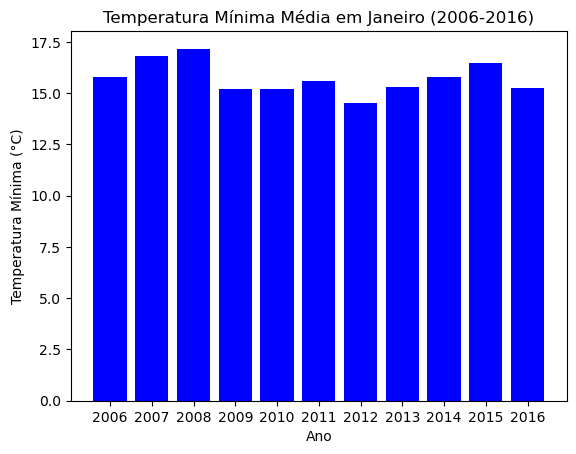

{'junho2006': 15.553333333333335, 'junho2007': 16.053333333333335, 'junho2008': 14.943333333333333, 'junho2009': 17.176666666666666, 'junho2010': 15.440000000000001, 'junho2011': 14.566666666666666, 'junho2012': 16.076666666666668, 'junho2013': 17.676666666666666, 'junho2014': 16.026666666666664, 'junho2015': 16.41, 'junho2016': 16.42}


In [72]:
# Exemplo de uso da função visualizar_dados
mes_ano_inicio = input("Digite o mês e ano de início (MM/YYYY): ")
mes_ano_fim = input("Digite o mês e ano de fim (MM/YYYY): ")
tipo_dado = int(input("Digite o tipo de dado (1: todos, 2: precipitação, 3: temperatura, 4: umidade e vento): "))

visualizar_dados(dados, mes_ano_inicio, mes_ano_fim, tipo_dado)

# Usar a função e exibir a saída
mes_mais_frio, ano_mais_frio, media_mes_mais_frio = encontrar_mes_mais_frio(dados)
mes_nome = {
    1: 'Janeiro', 2: 'Fevereiro', 3: 'Março', 4: 'Abril', 
    5: 'Maio', 6: 'Junho', 7: 'Julho', 8: 'Agosto', 
    9: 'Setembro', 10: 'Outubro', 11: 'Novembro', 12: 'Dezembro'
}.get(mes_mais_frio, 'Desconhecido')

print(f"O mês mais frio é {mes_nome}/{ano_mais_frio} com uma média de temperatura mínima de {media_mes_mais_frio:.2f}°C")

# Calcular a média geral da temperatura mínima
media_temp_min_geral = calcular_media_temperatura_minima_geral(media_temp_min_anos)
print(f"Média geral da temperatura mínima em janeiro: {media_temp_min_geral}")

# Calcular a média da temperatura mínima para o mês de janeiro (1)
media_temp_min_anos = calcular_media_temperatura_minima(dados, 1)
print(media_temp_min_anos)

# Encontrar o mês mais chuvoso
mes_mais_chuvoso, ano_mais_chuvoso, maior_precipitacao = encontrar_mes_mais_chuvoso(dados)
print(f"O mês mais chuvoso é {mes_mais_chuvoso}/{ano_mais_chuvoso} com uma precipitação total de {maior_precipitacao:.2f} mm.")

# Gerar o gráfico de barras
gerar_grafico_barras(media_temp_min_anos, 1)

# Calcular a média da temperatura mínima para um mês específico nos últimos 11 anos
mes = int(input("Digite o mês (1-12) para calcular a média da temperatura mínima nos últimos 11 anos: "))
medias_temp_min = calcular_media_temp_minima_mes(dados, mes)
print(medias_temp_min)